### Decision tree

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
 الگوریتم ساخت درخت تصمیم به صورت زیر میباشد:
<ol>
<li>
یک ویژگی انتخاب می شود و داده‌ها بر اساس یک شرط روی آن ویژگی تقسیم می‌شوند. بهترین ویژگی، ویژگی‌ای است که داده‌ها را به بهترین شکل تقسیم می‌کند.
</font></div>

<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<b><i>
 ID3 الگوریتم
</i></b>
</font></div>
<p></p>
<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در ادامه‌ی این نوشته به بررسی الگوریتم ID3 که یک الگوریتم پایه‌ای برای ساخت درخت تصمیم است می‌پردازیم.
<h3>بهره‌ی اطلاعاتی</h3>
 برای تعیین رسیدن به برگ‌های درخت نیاز به بررسی این موضوع داریم که آیا داده‌های یک گره به‌اندازه‌ی کافی یکدست شده‌اند یا خیر. در الگوریتم ID3 برای این کار از معیار بهره‌ی اطلاعاتی استفاده می‌شود.
برای تعریف بهره‌ی اطلاعاتی ابتدا انتروپی را تعریف می‌کنیم.
<br>
انتروپی یک معیار عددی برای اندازه‌گیری اطلاعات یا تصادفی بودن یک متغیر تصادفی است. این معیار به صورت زیر تعریف می‌شود:
</font></div>

$H(X) := -\sum_{x \in \mathcal{x}} P(x)\; logP(x) = \mathbb{E}[-logP(x)]$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در مسئله‌ی دسته‌بندی دو کلاسه می‌توانیم احتمال انتساب داده به هر کلاس را با توزیع برنولی مدل کنیم. در این صورت خواهیم داشت:
</font></div>

$H(x):= -P_+\; logP_+ - P_-\; logP_-$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
نمودار زیر این تابع را بر حسب احتمال انتساب به ‌دسته‌ی مثبت نشان می‌دهد.
</font></div>

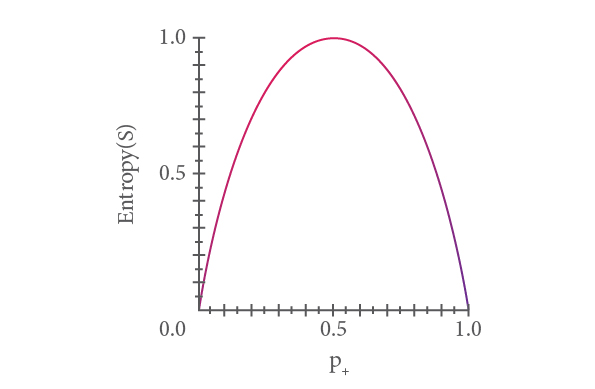

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
هر چه مقدار انتروپی بیشتر باشد ابهام درباره‌ی متغیر تصادفی بیشتر است. در مثال  بالا بیشینه‌ی انتروپی بازای مقدار احتمال ۰.۵ (مثلا یک سکه‌ی متوازن) رخ می‌دهد. هر چقدر به احتمال‌های ۰ یا ۱ نزدیک شویم (سکه نامتوازن‌تر شود) مقدار ابهام کم می‌شود.
<br>
بنابراین طبق آن‌چه گفته شد انتروپی به طور شهودی ابهام موجود در توزیع داده‌ها را به ما نشان‌ می‌دهد. از طرف دیگر اشاره شد که هنگام ساختن گره‌ها باید ویژگی‌ای انتخاب شود که دسته‌بندی داده‌ها براساس آن بیشترین یکدستی را در دسته‌های تولید شده، ایجاد کند. بنابراین یک معیار می‌تواند این باشد که این دسته‌بندی چقدر از انتروپی موجود در داده‌ها کاسته است. به این مقدار بهره‌ی اطلاعاتی گفته می‌شود.
</font></div>

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Entropy(S_v)$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
که در رابطه‌ی بالا S
مجموعه‌ی داده‌ها در گره قبل از تقسیم‌بندی است، A
ویژگی‌ای است که بر اساس آن داده‌ها تقسیم‌بندی می‌شوند.  Values(A)
مقادیر مختلفی است که ویژگی A
می‌تواند داشته باشد و
$S_v$
زیرمجموعه‌ای از S است که ویژگی A در آنها برابر با $v$ است.
<br>

In [1]:
import pandas as pd
import numpy as np

حال در زیر توابع لازم از جمله آنتروپی و بهره اطلاعاتی را تکمیل کنید.
از این توابع در تعریف کردن مدل یادگیری و انتخاب بهترین ویژگی استفاده خواهیم کرد.

In [2]:
# (10 Points)
from math import log
from collections import Counter

def entropy(y: pd.Series):
   # return the entropy of input
    unique_values, value_counts = np.unique(y, return_counts=True)
    probabilities = value_counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(x: pd.Series, y: pd.Series):
    # return the information gain of x
    original_entropy = entropy(y) # Assuming you have defined the entropy function
    unique_values, value_counts = np.unique(x, return_counts=True)
    weighted_entropies = []

    for value, count in zip(unique_values, value_counts):
        # Subset of y where x is equal to the current value
        subset_y = y[x == value]
        # Weighted entropy for the current value of x
        weighted_entropy = (count / len(x)) * entropy(subset_y)
        weighted_entropies.append(weighted_entropy)

    result = original_entropy - np.sum(weighted_entropies)
    return result

def information_gains(X: pd.DataFrame, y: pd.Series):
    # return the information gain of all features
    # I return the maximum feature's information gain's index
    feature_gain = {}
    for column_n , column in X.items() :
      feature_gain[column_n] = information_gain(column.values,y)
    max_key = max(feature_gain, key=feature_gain.get)
    return max_key


<div dir=rtl>
حال در زیر کلاس Node  را تعریف میکنیم که  بیس اصلی مدل ما را تشکیل میدهد .

با استفاده از توابعی که در قسمت قبل نوشتید مدل یادگیری خود را کامل کنید.

In [3]:
# you can add any variable or function to class if you need.
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None,min_samples_split=None, max_depth=None):
      # Each node in the tree is an instance of class `Node` which is capable of predicting and fitting
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        # initialize the root of the tree
        self.root = None
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # for leaf node
        self.value = value

    def build_tree(self, X, Y, curr_depth=0):
        # recursive function to build the tree
        # split dataset to target and features
        num_samples, num_features = np.shape(X)
        n_labels = len(np.unique(Y))

        # split until stopping conditions are met
        print('num_samples:',num_samples,'.curr_depth:',curr_depth,'.n_labels:',n_labels)
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth and n_labels > 1:
            # find the best split
            print(f"leaf node at depth {curr_depth}")
            best_split = self.get_best_split( X, Y)
            # check if information gain is positive
            # if best_split["info_gain"]>0:
                # recur left
            left_subtree = self.build_tree(best_split["dataset_left"],Y.iloc[best_split["dataset_left_index"],:], curr_depth+1)
                # recur right
            right_subtree = self.build_tree(best_split["dataset_right"],Y.iloc[best_split["dataset_right_index"],:], curr_depth+1)
                # return decision node
            return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, X , y):
        ''' function to find the best split '''
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        best_split["info_gain"] = 0
        Best_feature_index = information_gains(X,y.loc[:,0].values)
        # print('Best_feature_index:',Best_feature_index)
        # print("Best feature index:",Best_feature_index)
        feature_values = X.iloc[:,Best_feature_index]
        possible_thresholds = np.unique(feature_values)
            # loop over all the threshold values present in the data
        if len(possible_thresholds) > 256:
            possible_thresholds = np.linspace(np.min(possible_thresholds), np.max(possible_thresholds), num=256)
        # print('possible_thresholds len:',len(possible_thresholds))
        for threshold in possible_thresholds:
            # get current split
            dataset_left_index, dataset_right_index = self.split(feature_values, threshold)
            dataset_left = X.iloc[dataset_left_index,:]
            dataset_right =  X.iloc[dataset_right_index,:]
            # check if childs are not null
            if len(dataset_left)>0 and len(dataset_right)>0:
                y, left_y, right_y = y, dataset_left.iloc[:, -1], dataset_right.iloc[:, -1]
                # compute information gain
                curr_info_gain = self.information_gain(y, left_y, right_y)
                if curr_info_gain>max_info_gain:
                    best_split["feature_index"] = Best_feature_index
                    best_split["threshold"] = threshold
                    best_split["dataset_left"] = dataset_left
                    best_split["dataset_left_index"] = dataset_left_index
                    best_split["dataset_right_index"] = dataset_right_index
                    best_split["dataset_right"] = dataset_right
                    best_split["info_gain"] = curr_info_gain
                    max_info_gain = curr_info_gain
        # return best split
        return best_split

    def split(self, X, threshold):
        # function to split the data
        Left_dataset_indexs , right_dataset_indexs= [],[]
        samples= len(X)
        for i in range(samples):
            if X.iloc[i] > threshold:
                right_dataset_indexs.append(i)
            else:
                Left_dataset_indexs.append(i)
        return Left_dataset_indexs , right_dataset_indexs

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        # function to compute information gain

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = entropy(parent) - (weight_l*entropy(l_child) + weight_r*entropy(r_child))
        return gain

    def calculate_leaf_value(self, Y):
        # function to compute leaf node
        counter = Counter(Y.iloc[:,0].values)
        return counter.most_common(1)[0][0]

    def fit(self, X, Y):
        self.root = self.build_tree(X, Y)

    def predict(self, X):
        # function to predict new dataset
        output_list =[]
        for idx,x in pd.DataFrame(X).iterrows() :
            value = self.make_prediction(x,self.root)
            output_list.append(value)
        return np.array(output_list)


    def make_prediction(self, x, tree):
        # function to predict a single data point
        if tree.value!=None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

###Training & Testing

<div dir=rtl>
حال دیتا ست mnist  را لود کنید و با مدل خود لرن کنید و دقت یادگیری را گزارش دهید.


In [4]:
from sklearn.decomposition import PCA
##########################################################
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
##########################################################
# import sys
# import pickle
# import gzip
# f = gzip.open('mnist.pkl.gz', 'rb')
# if sys.version_info < (3,):
#     data = pickle.load(f)
# else:
#     data = pickle.load(f, encoding='bytes')
# f.close()
# dataset = data
# (x_train, y_train), (x_test, y_test) = dataset
#########################################################
# scale data to [0 ,1]
x_train= x_train/ (np.max(x_train))
x_test = x_test / (np.max(x_test))
#reshape data from 28*28 matrix to 784 array
x_train= np.reshape(x_train,(len(x_train) ,784))
x_test = np.reshape(x_test,(len(x_test) ,784))
y_test = np.reshape  (y_test,(len(y_test) ,1))
y_train = np.reshape  (y_train,(len(y_train) ,1))
# initializing the pca
# implement pca on our data with 10 component
# select 10 components for train and test data
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  pca = PCA(n_components = n_components)
  pca_data = pca.fit_transform(data)
  return pca_data

# ToDo
x_train_pca = do_pca(10, x_train)
x_test_pca = do_pca(10,x_test)

#convert reduced datasets types to dataframe using pd
x_train=pd.DataFrame(x_train_pca)
x_test=pd.DataFrame(x_test_pca)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
##################################
# x_train =x_train.iloc[0:2000,:]
# y_train =y_train.iloc[0:2000,:]


In [5]:
#   train classifier on you train set   #
classifier = Node(min_samples_split=10, max_depth=8)
classifier.fit(x_train,y_train)

num_samples: 60000 .curr_depth: 0 .n_labels: 10
leaf node at depth 0
num_samples: 25010 .curr_depth: 1 .n_labels: 10
leaf node at depth 1
num_samples: 12033 .curr_depth: 2 .n_labels: 10
leaf node at depth 2
num_samples: 5513 .curr_depth: 3 .n_labels: 10
leaf node at depth 3
num_samples: 4196 .curr_depth: 4 .n_labels: 10
leaf node at depth 4
num_samples: 3492 .curr_depth: 5 .n_labels: 10
leaf node at depth 5
num_samples: 3179 .curr_depth: 6 .n_labels: 9
leaf node at depth 6
num_samples: 266 .curr_depth: 7 .n_labels: 8
leaf node at depth 7
num_samples: 84 .curr_depth: 8 .n_labels: 5
leaf node at depth 8
num_samples: 15 .curr_depth: 9 .n_labels: 2
num_samples: 69 .curr_depth: 9 .n_labels: 5
num_samples: 182 .curr_depth: 8 .n_labels: 7
leaf node at depth 8
num_samples: 1 .curr_depth: 9 .n_labels: 1
num_samples: 181 .curr_depth: 9 .n_labels: 7
num_samples: 2913 .curr_depth: 7 .n_labels: 9
leaf node at depth 7
num_samples: 4 .curr_depth: 8 .n_labels: 1
num_samples: 2909 .curr_depth: 8 .n_lab

In [6]:
#   report model accuracy   #
from sklearn.metrics import accuracy_score
Y_pred = classifier.predict(x_test)
accuracy_score(Y_pred, y_test)

0.7188